In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("scopus.csv")

In [ ]:
data["Authors"]

0                                                     NaN
1       Sorwar G.; Aggar C.; Penman O.; Seton C.; Ward A.
2       Kumpik D.P.; Santos-Rodriguez R.; Selwood J.; ...
3       Ramanathan U.; Pelc K.; Costa T.P.D.; Ramanath...
4       Hayashi V.T.; Ruggiero W.V.; Estrella J.C.; Fi...
                              ...                        
1817    McConville R.; Archer G.; Craddock I.; Kozłows...
1818    Yi C.; Jiang F.; Bhuiyan M.Z.A.; Yang C.; Gao ...
1819                                                  NaN
1820                                  Thakur N.; Han C.Y.
1821    Rout S.; Patra S.S.; Mohanty J.R.; Barik R.K.;...
Name: Authors, Length: 1822, dtype: object

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
data.keys()

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Abstract', 'Indexed Keywords',
       'Author Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [ ]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

"CPU utilization; Energy efficiency; Fog architecture; Fog computing; Load balancing Activities of daily living; Big data; Elderly population; Healthcare; Human-computer interaction; Smart cities; Smart homes; Ubiquitous systems nan Electromyography; Inertial measurement unit; Inverse dynamic model; Long short term memory nan Emerging technologies; health; requirements/specifications; ubiquitous computing living-lab; preference; smart item; Smart-Home; usability cost-minimization analysis; Exercise therapy; instructional films and videos; multimedia; rehabilitation; video recording advocacy; firearms; injury prevention; safe storage E-learning; Face recognition; Health monitoring; Precision agriculture; Recommendation systems; Renewable energy; Self-reliant; Smart education system; Smart security system; ThingSpeak; Twilio Artificial intelligence; Cloud computing; Intelligent transportation system; Internet of things; Internet of vehicles; VANET nan Architecture; Home automation; IoT; 

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
smart,691
home,344
iot,342
health,303
internet,292
things,280
nan,268
learning,238
monitoring,227
care,194


In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

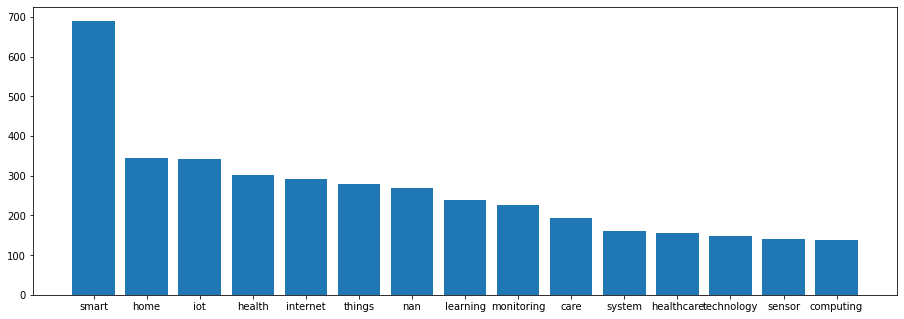

In [ ]:
plot_bar(data=df, top=15)

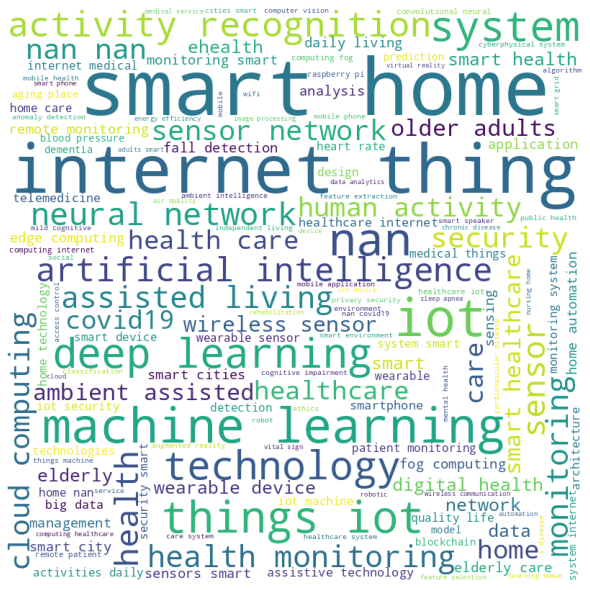

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

,Authors,Author full names,Author(s) ID,Titles,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,Link,Abstract,Indexed Keywords,Author Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,NaN,NaN,NaN,"3rd International Conference on Data Science, ...",2023,Lecture Notes in Electrical Engineering,947,NaN,NaN,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,The proceedings contain 85 papers. The special...,NaN,NaN,Conference review,Final,NaN,Scopus,2-s2.0-85149973181
1,Sorwar G.; Aggar C.; Penman O.; Seton C.; Ward A.,"Sorwar, Golam (55941054300); Aggar, Christina ...",55941054300; 25633909900; 57225071643; 5718853...,Factors that predict the acceptance and adopti...,2023,Informatics for Health and Social Care,48,1,NaN,80,...,1,https://www.scopus.com/inward/record.uri?eid=2...,Smart Home Technology presents an exciting opp...,Aged; Australia; Humans; Longitudinal Studies;...,acceptance and adoption models; australian; se...,Article,Final,NaN,Scopus,2-s2.0-85130010999
2,Kumpik D.P.; Santos-Rodriguez R.; Selwood J.; ...,"Kumpik, Daniel Paul (26434363200); Santos-Rodr...",26434363200; 27968154800; 57205408054; 5554260...,A longitudinal observational study of home-bas...,2022,BMJ Open,12,11,e065033,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Introduction Limitations in effective dementia...,Biomarkers; Cognitive Dysfunction; Dementia; F...,Adult neurology; Dementia; GERIATRIC MEDICINE;...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85142939066
3,Ramanathan U.; Pelc K.; Costa T.P.D.; Ramanath...,"Ramanathan, Usha (35222184300); Pelc, Katarzyn...",35222184300; 57971513800; 58055713800; 5805549...,A Case Study of Human Milk Banking with Focus ...,2023,Sustainability (Switzerland),15,1,243,NaN,...,2,https://www.scopus.com/inward/record.uri?eid=2...,Human milk is the biological norm for newborn ...,algorithm; blood; GPS; milk; relative humidity...,human milk bank; IoT technologies; temperature...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85146046545
4,Hayashi V.T.; Ruggiero W.V.; Estrella J.C.; Fi...,"Hayashi, Victor Takashi (57218551681); Ruggier...",57218551681; 6507255889; 15059935900; 57350705...,A TDD Framework for Automated Monitoring in In...,2022,Sensors,22,23,9498,NaN,...,1,https://www.scopus.com/inward/record.uri?eid=2...,"Robust, fault tolerant, and available systems ...",Algorithms; Internet; Internet of Things; Mach...,IoT; machine learning; software engineering; T...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85143755750
